In [83]:
import pandas as pd
import numpy as np
import zipfile as zf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [ ]:
 # extract the zip file
un_zip = zf.ZipFile('Inceptez_hackathon.zip')
un_zip.extractall()

In [ ]:
# Load the data
train = pd.read_csv("train_loan_data.csv")
test = pd.read_csv("test_loan_data.csv")
sample = pd.read_csv("test_results.csv")


In [ ]:
train

addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0         Jul-1997  10+ years   
1             CA     40000.0         Apr-1987  10+ years   
2             FL     60000.0         Aug-2007  10+ years   
3             IL    100742.0         Sep-1980  10+ years   
4             MD     80000.0         Jul-1999  10+ years   
...          ...         ...              ...        ...   
79995         SC     81000.0         Feb-2000  10+ years   
79996         NH     45000.0         Aug-1995  10+ years   
79997         NY     90000.0         Apr-2005   < 1 year   
79998         TX     94000.0         Apr-1992    3 years   
79999         NY   1100000.0         Jun-1999    2 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy            744.0           740.0     E   
1      Department of Veterans Affairs            724.0           720.0     B   
2                    Marble polishing            679.0           675.0     B   
3                             printer            664.0           660.0     B   
4                       Southern Mgmt            669.0           665.0     F   
...                               ...              ...             ...   ...   
79995            Sports Group Manager            664.0           660.0     G   
79996                    Web Designer            684.0           680.0     C   
79997                 Program Officer            724.0           720.0     B   
79998            Sr. Business Analyst            669.0           665.0     D   
79999               Managing Director            664.0           660.0     B   

      home_ownership application_type  ... pub_rec_bankruptcies  \
0           MORTGAGE       Individual  ...                  0.0   
1               RENT       Individual  ...                  0.0   
2           MORTGAGE       Individual  ...                  0.0   
3           MORTGAGE       Individual  ...                  0.0   
4               RENT       Individual  ...                  0.0   
...              ...              ...  ...                  ...   
79995       MORTGAGE       Individual  ...                  0.0   
79996       MORTGAGE       Individual  ...                  0.0   
79997            OWN       Individual  ...                  0.0   
79998       MORTGAGE       Individual  ...                  1.0   
79999       MORTGAGE       Individual  ...                  0.0   

                  purpose  revol_bal  revol_util  sub_grade        term  \
0      debt_consolidation     5338.0        93.6         E1   60 months   
1      debt_consolidation    19944.0        60.3         B1   36 months   
2      debt_consolidation    23199.0        88.5         B5   36 months   
3      debt_consolidation    18425.0        69.0         B2   36 months   
4      debt_consolidation    34370.0        90.0         F5   60 months   
...                   ...        ...         ...        ...         ...   
79995  debt_consolidation    20201.0        93.5         G3   60 months   
79996  debt_consolidation     6145.0        56.9         C1   36 months   
79997  debt_consolidation     3910.0        25.6         B4   36 months   
79998         credit_card    11897.0        49.4         D5   60 months   
79999  debt_consolidation   586259.0        96.7         B4   36 months   

                         title  total_acc  verification_status  loan_status  
0           Debt consolidation        8.0      Source Verified  Charged Off  
1                  Credit Loan       12.0             Verified   Fully Paid  
2           Debt consolidation       16.0      Source Verified   Fully Paid  
3           Debt consolidation       19.0      Source Verified   Fully Paid  
4          Debt Connsolidation       59.0             Verified   Fully Paid  
...                        ...        ...                  ...          ...  
79995       Debt consolidation       42.0             Verified  Charged 

In [ ]:
train.nunique()

addr_state                 51
annual_inc               7536
earliest_cr_line          640
emp_length                 11
emp_title               36661
fico_range_high            38
fico_range_low             38
grade                       7
home_ownership              6
application_type            2
initial_list_status         2
int_rate                  549
loan_amnt                1373
num_actv_bc_tl             28
mort_acc                   28
tot_cur_bal             65410
open_acc                   56
pub_rec                    15
pub_rec_bankruptcies        8
purpose                    14
revol_bal               32971
revol_util               1080
sub_grade                  35
term                        2
title                    5349
total_acc                 107
verification_status         3
loan_status                 2
dtype: int64

In [ ]:
# check for duplicates
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [ ]:
#combining the dataset
data = pd.concat([train,test])

In [ ]:
train.shape,test.shape,sample.shape

((80000, 28), (20000, 27), (20000, 1))

In [ ]:
data.describe()

annual_inc  fico_range_high  fico_range_low       int_rate  \
count  1.000000e+05    100000.000000   100000.000000  100000.000000   
mean   7.613644e+04       700.031260      696.031100      13.238209   
std    7.265827e+04        31.741546       31.740792       4.771758   
min    0.000000e+00       664.000000      660.000000       5.310000   
25%    4.600000e+04       674.000000      670.000000       9.750000   
50%    6.500000e+04       694.000000      690.000000      12.740000   
75%    9.000000e+04       714.000000      710.000000      15.990000   
max    9.522972e+06       850.000000      845.000000      30.990000   

           loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal  \
count  100000.000000    95041.000000  96525.000000  9.504100e+04   
mean    14408.428500        3.630517      1.673670  1.415093e+05   
std      8725.405078        2.254231      2.000409  1.586730e+05   
min       750.000000        0.000000      0.000000  0.000000e+00   
25%      7900.000000        2.000000      0.000000  2.963500e+04   
50%     12000.000000        3.000000      1.000000  8.092800e+04   
75%     20000.000000        5.000000      3.000000  2.108750e+05   
max     40000.000000       32.000000     32.000000  5.172185e+06   

            open_acc        pub_rec  pub_rec_bankruptcies     revol_bal  \
count  100000.000000  100000.000000          99958.000000  1.000000e+05   
mean       11.603230       0.214940              0.135827  1.626783e+04   
std         5.488242       0.577671              0.381407  2.250461e+04   
min         1.000000       0.000000              0.000000  0.000000e+00   
25%         8.000000       0.000000              0.000000  5.935000e+03   
50%        11.000000       0.000000              0.000000  1.110100e+04   
75%        14.000000       0.000000              0.000000  1.967500e+04   
max        80.000000      24.000000              8.000000  1.023940e+06   

         revol_util      total_acc  
count  99934.000000  100000.000000  
mean      51.861263      25.033960  
std       24.505807      12.027108  
min        0.000000       2.000000  
25%       33.400000      16.000000  
50%       52.200000      23.000000  
75%       70.800000      32.000000  
max      152.600000     162.000000

In [ ]:
data.value_counts()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title                      fico_range_high  fico_range_low  grade  home_ownership  application_type  initial_list_status  int_rate  loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  pub_rec_bankruptcies  purpose             revol_bal  revol_util  sub_grade  term        title                    total_acc  verification_status  loan_status
AK          20000.0     May-2001          4 years     Attendant on a school Bus      674.0            670.0           C      MORTGAGE        Individual        w                    12.39     5000.0     3.0             1.0       76470.0      6.0       1.0      1.0                   debt_consolidation  6724.0     93.4        C1          36 months  Debt consolidation       12.0       Verified             Fully Paid     1
NY          57000.0     Jul-2001          10+ years   Courier                        664.0            660.0           F      MORTGAGE        Individual        f   

In [ ]:
#checking null values
data.isna().sum()

addr_state                  0
annual_inc                  0
earliest_cr_line            0
emp_length               5846
emp_title                6396
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
application_type            0
initial_list_status         0
int_rate                    0
loan_amnt                   0
num_actv_bc_tl           4959
mort_acc                 3475
tot_cur_bal              4959
open_acc                    0
pub_rec                     0
pub_rec_bankruptcies       42
purpose                     0
revol_bal                   0
revol_util                 66
sub_grade                   0
term                        0
title                    1217
total_acc                   0
verification_status         0
loan_status             20000
dtype: int64

In [ ]:
data['emp_length'].unique()

array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [ ]:
data['emp_length'].replace({'10+ years':10,'3 years':3,'< 1 year':1.5,'1 year':'1', '8 years':'8', '7 years':'7','4 years':4,'2 years':'2', '5 years':'5','6 years':'6','9 years':'9'}, inplace = True)

In [ ]:
data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce')

In [ ]:
data['emp_length'].mean()

6.091275994647067

In [ ]:
data['emp_length'].fillna(data['emp_length'].mean(), inplace = True)

In [ ]:
data['emp_title'].fillna(data['emp_title'].mode()[0], inplace = True)


In [ ]:
data['num_actv_bc_tl'].unique()

array([ 1.,  4., 14., nan,  2.,  3.,  6.,  5.,  8.,  0.,  9.,  7., 11.,
       10., 17., 13., 12., 19., 25., 16., 15., 20., 18., 24., 21., 22.,
       26., 27., 32.])

In [ ]:
data.head()

addr_state  annual_inc earliest_cr_line  emp_length  \
0         CO     85000.0         Jul-1997        10.0   
1         CA     40000.0         Apr-1987        10.0   
2         FL     60000.0         Aug-2007        10.0   
3         IL    100742.0         Sep-1980        10.0   
4         MD     80000.0         Jul-1999        10.0   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy            744.0           740.0     E   
1  Department of Veterans Affairs            724.0           720.0     B   
2                Marble polishing            679.0           675.0     B   
3                         printer            664.0           660.0     B   
4                   Southern Mgmt            669.0           665.0     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation     5338.0        93.6         E1   60 months   
1  debt_consolidation    19944.0        60.3         B1   36 months   
2  debt_consolidation    23199.0        88.5         B5   36 months   
3  debt_consolidation    18425.0        69.0         B2   36 months   
4  debt_consolidation    34370.0        90.0         F5   60 months   

                 title  total_acc  verification_status  loan_status  
0   Debt consolidation        8.0      Source Verified  Charged Off  
1          Credit Loan       12.0             Verified   Fully Paid  
2   Debt consolidation       16.0      Source Verified   Fully Paid  
3   Debt consolidation       19.0      Source Verified   Fully Paid  
4  Debt Connsolidation       59.0             Verified   Fully Paid  

[5 rows x 28 columns]

In [ ]:
data['num_actv_bc_tl'].fillna(data['num_actv_bc_tl'].mean(), inplace = True)

In [ ]:
data['mort_acc'].unique()

array([ 1.,  0.,  2.,  7.,  4., nan,  3.,  5.,  8., 12.,  9.,  6., 10.,
       11., 13., 16., 14., 26., 18., 15., 32., 22., 19., 20., 27., 31.,
       17., 24., 29.])

In [ ]:
data['mort_acc'].fillna(data['mort_acc'].mean(), inplace = True)

In [ ]:
data['tot_cur_bal'].isna().sum()
data['tot_cur_bal'].fillna(0, inplace = True)

In [ ]:

data['pub_rec_bankruptcies'].fillna(0, inplace = True)

In [ ]:

data['revol_util'].fillna(data['revol_util'].mean(), inplace = True)

In [ ]:
data['title'].fillna(data['title'].mode()[0], inplace = True)


In [ ]:
data.head()

addr_state  annual_inc earliest_cr_line  emp_length  \
0         CO     85000.0         Jul-1997        10.0   
1         CA     40000.0         Apr-1987        10.0   
2         FL     60000.0         Aug-2007        10.0   
3         IL    100742.0         Sep-1980        10.0   
4         MD     80000.0         Jul-1999        10.0   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy            744.0           740.0     E   
1  Department of Veterans Affairs            724.0           720.0     B   
2                Marble polishing            679.0           675.0     B   
3                         printer            664.0           660.0     B   
4                   Southern Mgmt            669.0           665.0     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation     5338.0        93.6         E1   60 months   
1  debt_consolidation    19944.0        60.3         B1   36 months   
2  debt_consolidation    23199.0        88.5         B5   36 months   
3  debt_consolidation    18425.0        69.0         B2   36 months   
4  debt_consolidation    34370.0        90.0         F5   60 months   

                 title  total_acc  verification_status  loan_status  
0   Debt consolidation        8.0      Source Verified  Charged Off  
1          Credit Loan       12.0             Verified   Fully Paid  
2   Debt consolidation       16.0      Source Verified   Fully Paid  
3   Debt consolidation       19.0      Source Verified   Fully Paid  
4  Debt Connsolidation       59.0             Verified   Fully Paid  

[5 rows x 28 columns]

In [ ]:
# EDA - Univariate analysis


<Axes: xlabel='loan_status', ylabel='Count'>

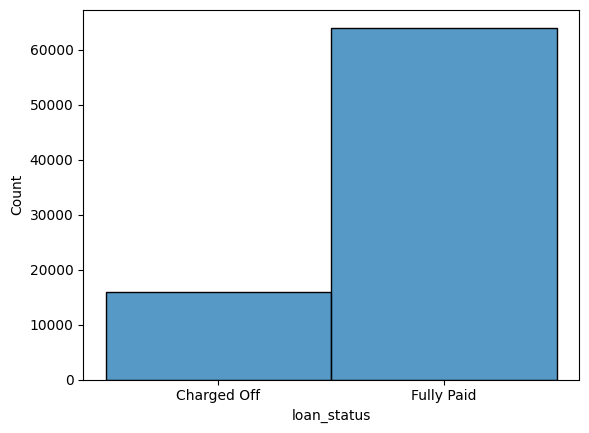

In [ ]:
sns.histplot(data['loan_status'])


annual_inc


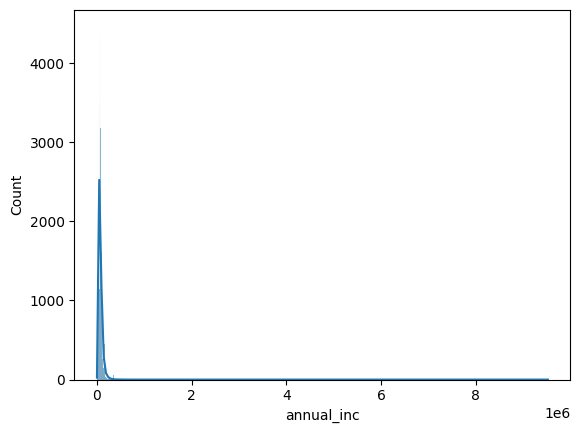

emp_length


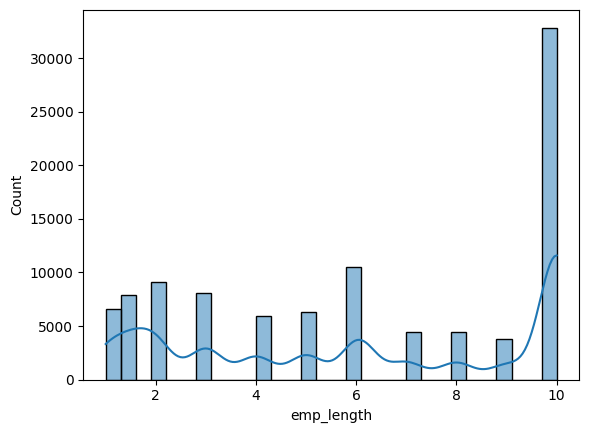

fico_range_high


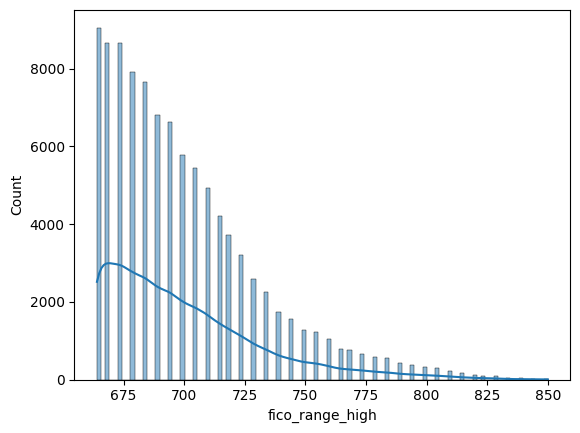

fico_range_low


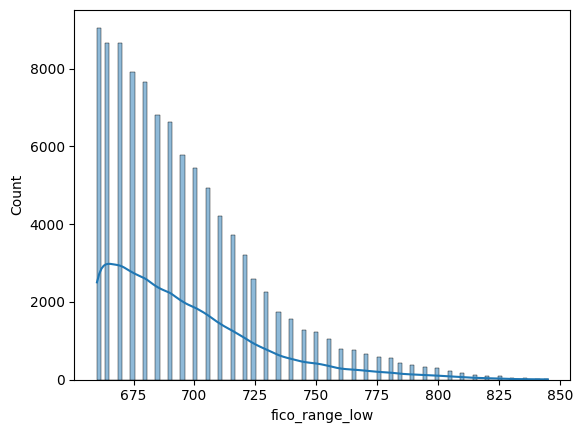

int_rate


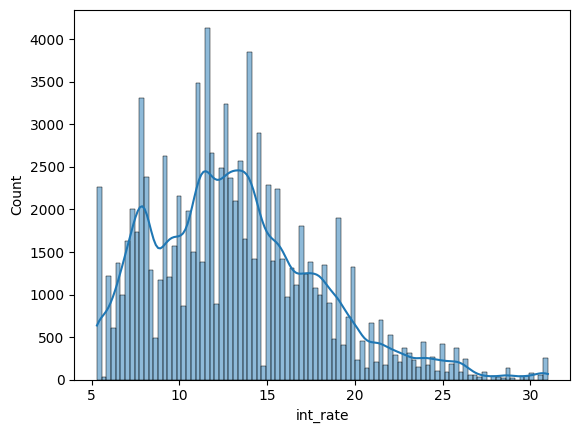

loan_amnt


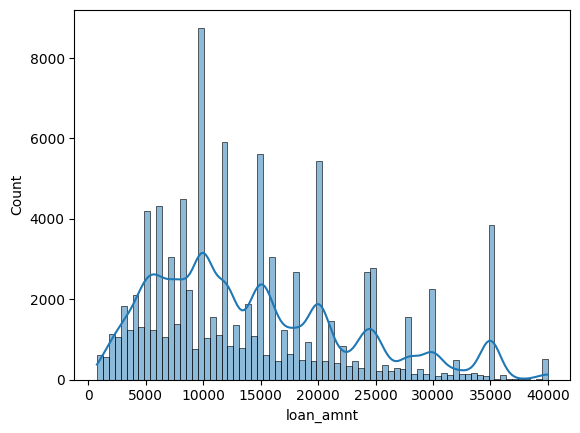

num_actv_bc_tl


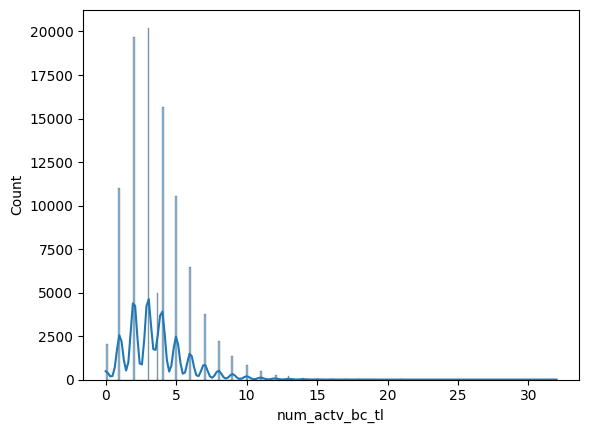

mort_acc


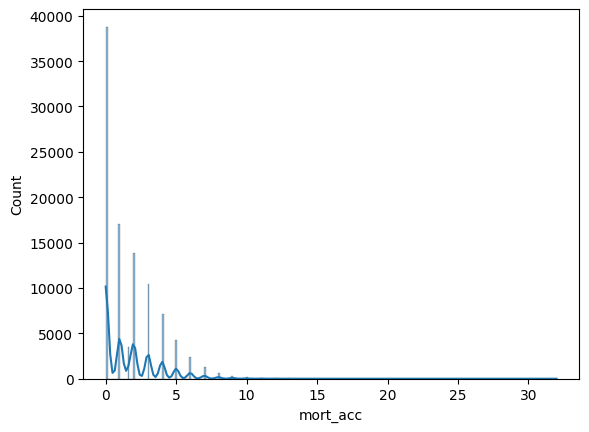

tot_cur_bal


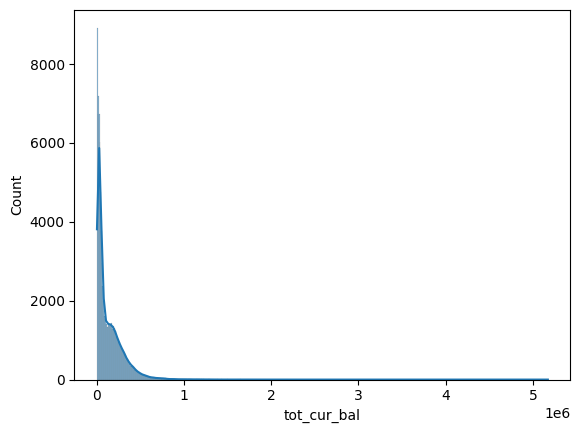

open_acc


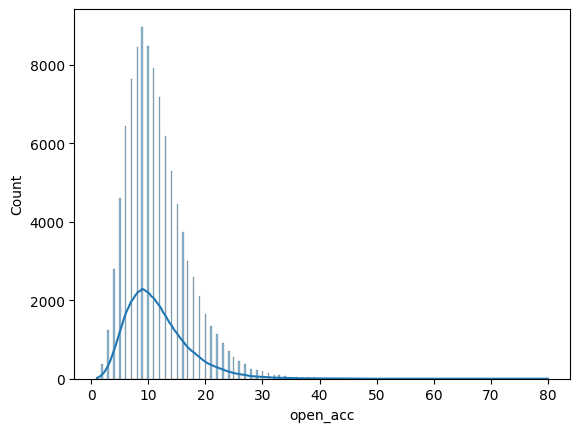

pub_rec


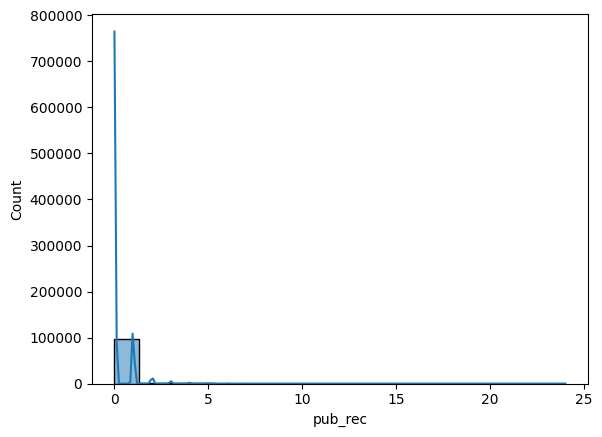

pub_rec_bankruptcies


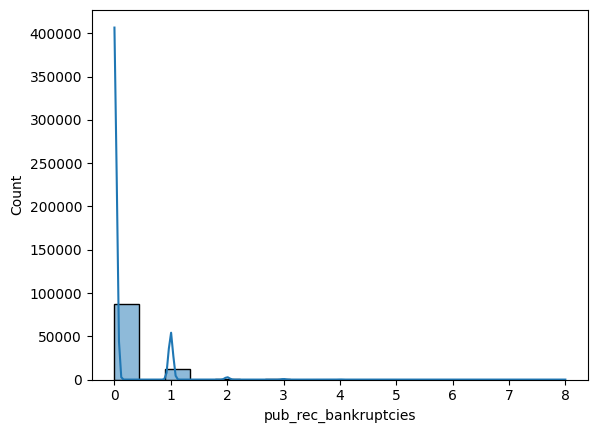

revol_bal


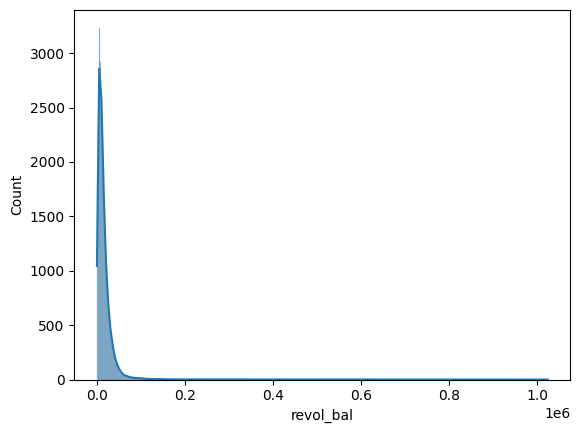

revol_util


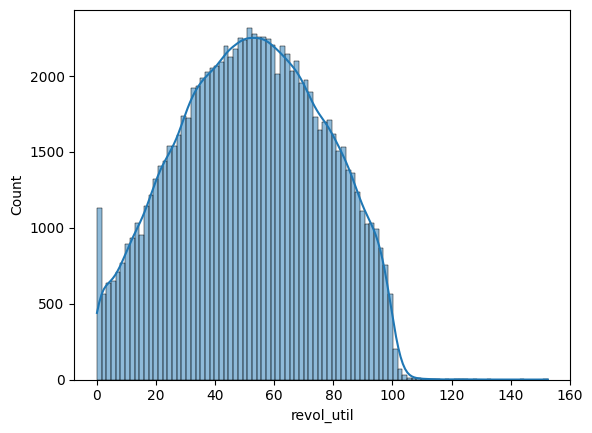

total_acc


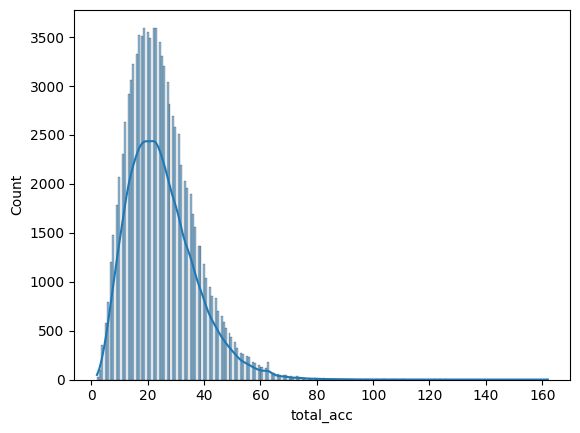

In [35]:
for col in data.select_dtypes(include=np.number).columns:
    print(col)
    sns.histplot(data[col], kde=True)
    plt.show()


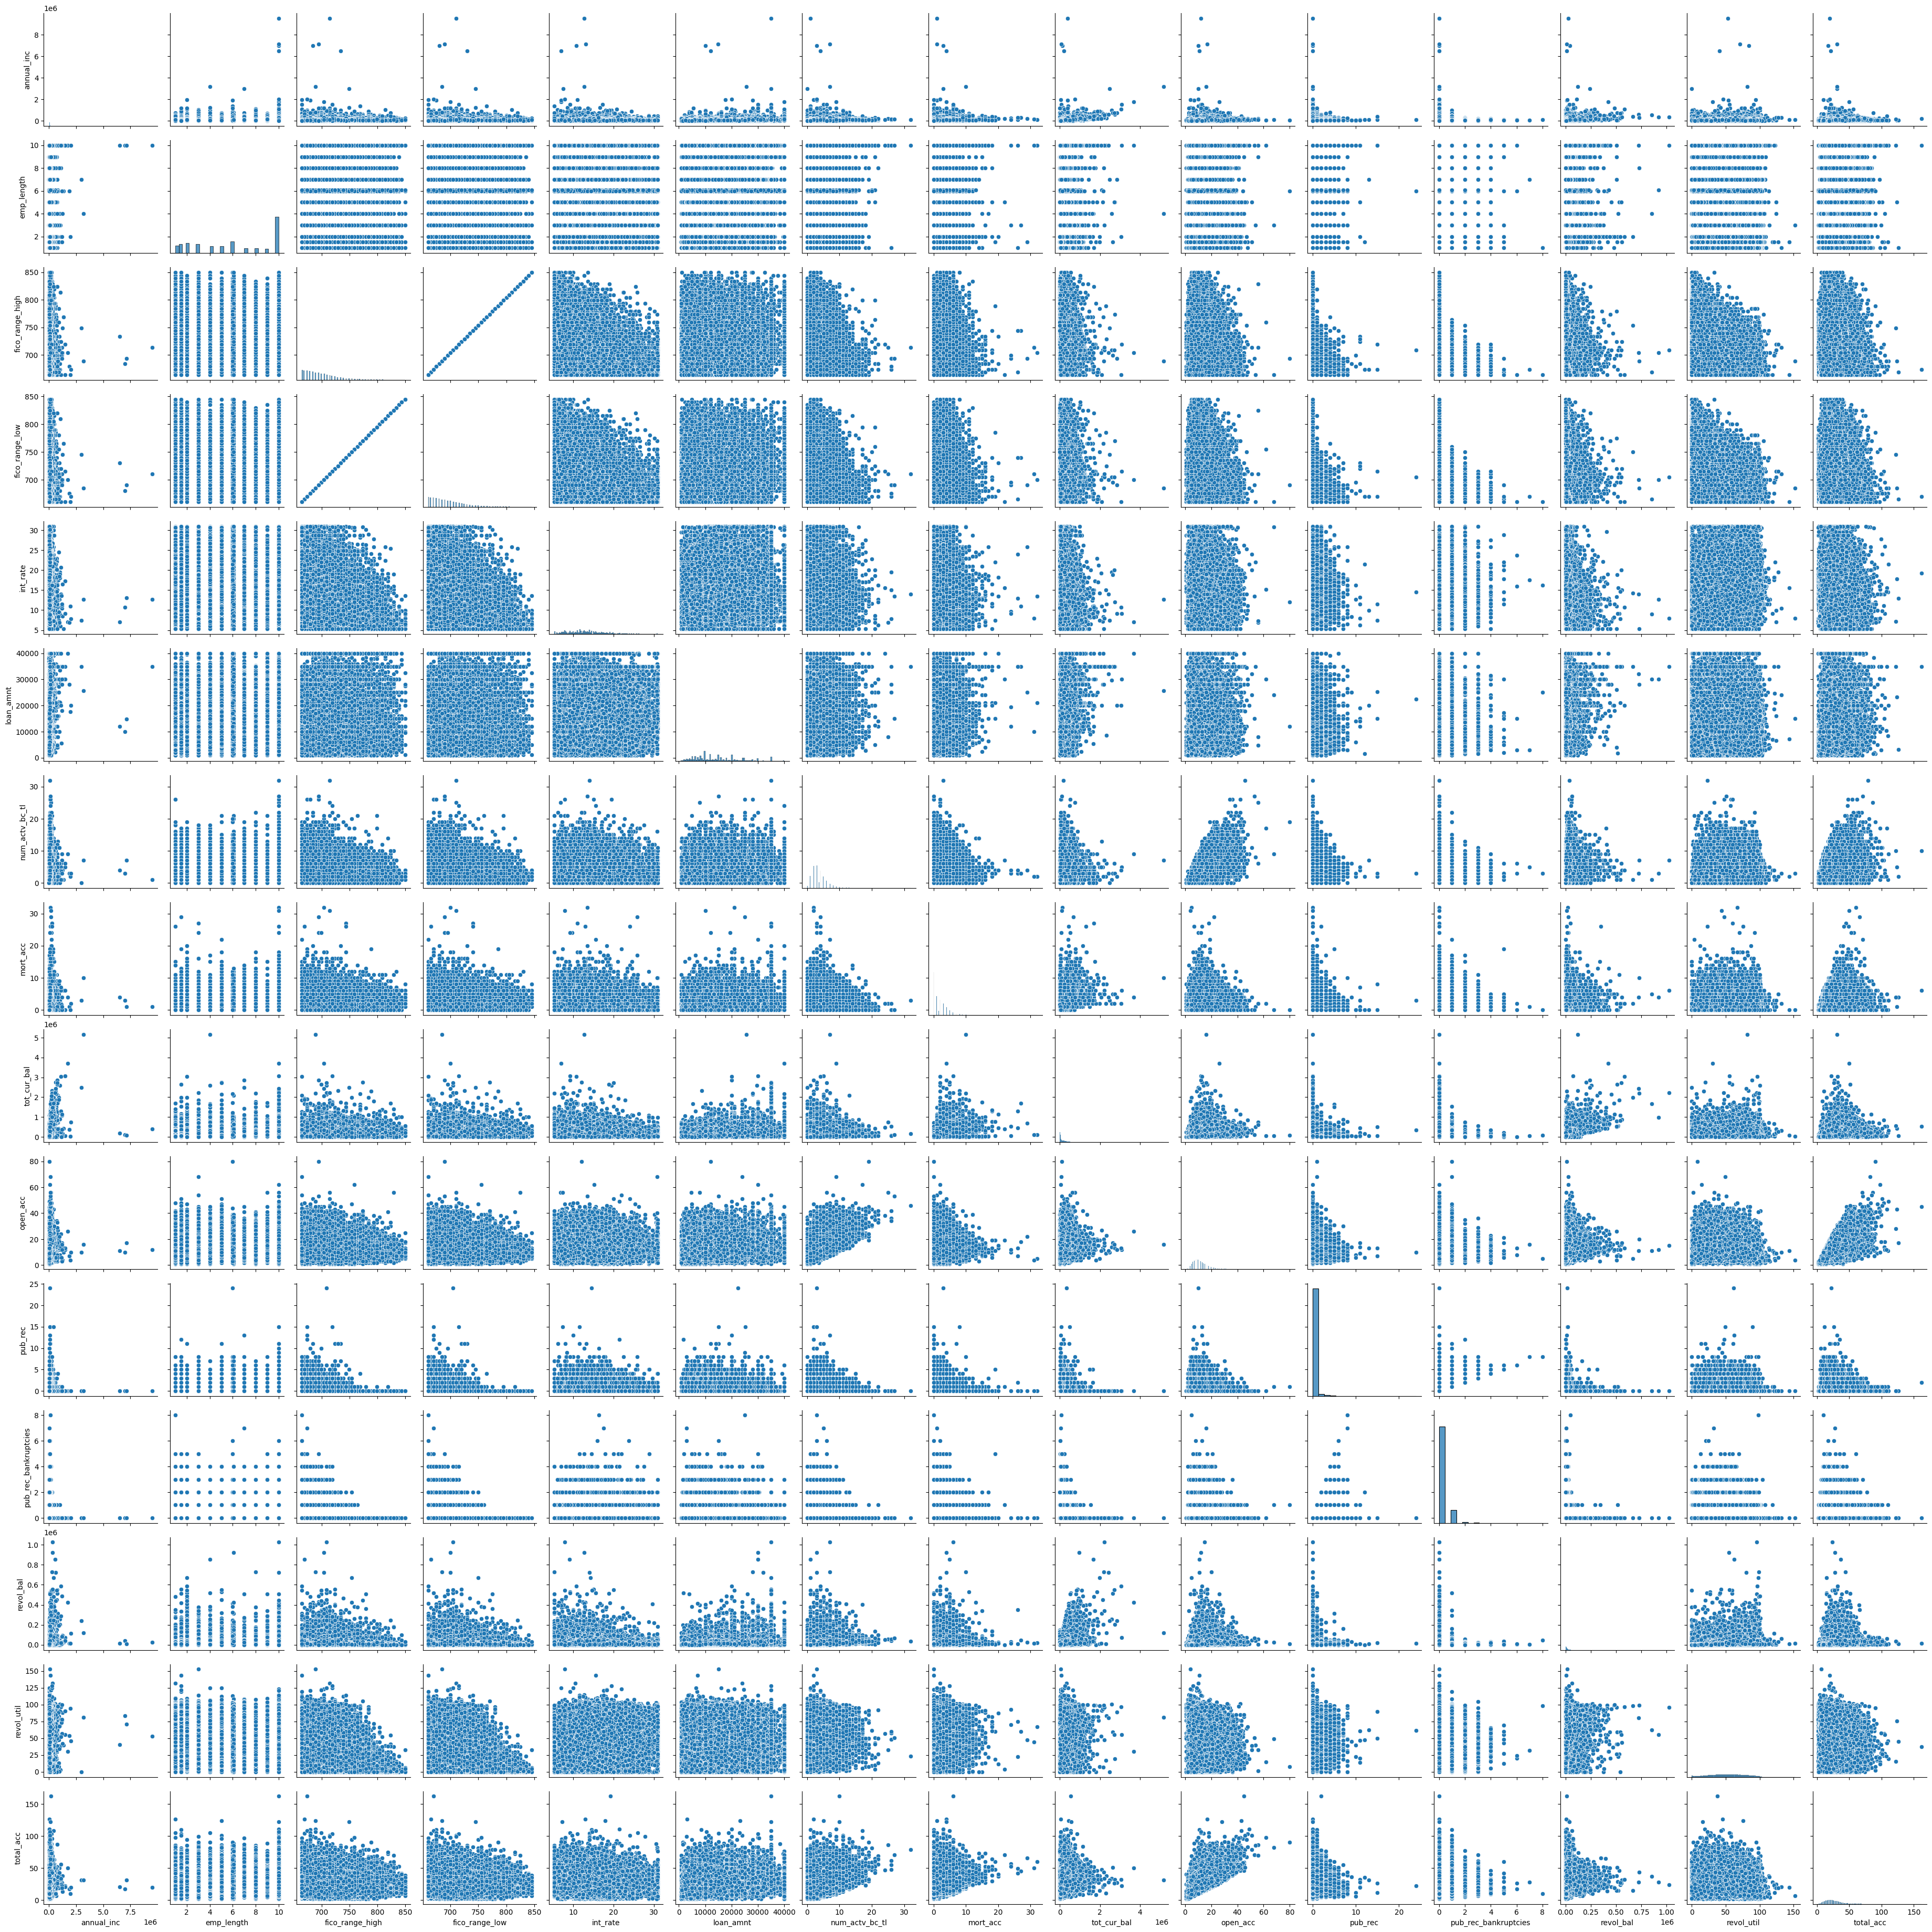

In [37]:
sns.pairplot(data)


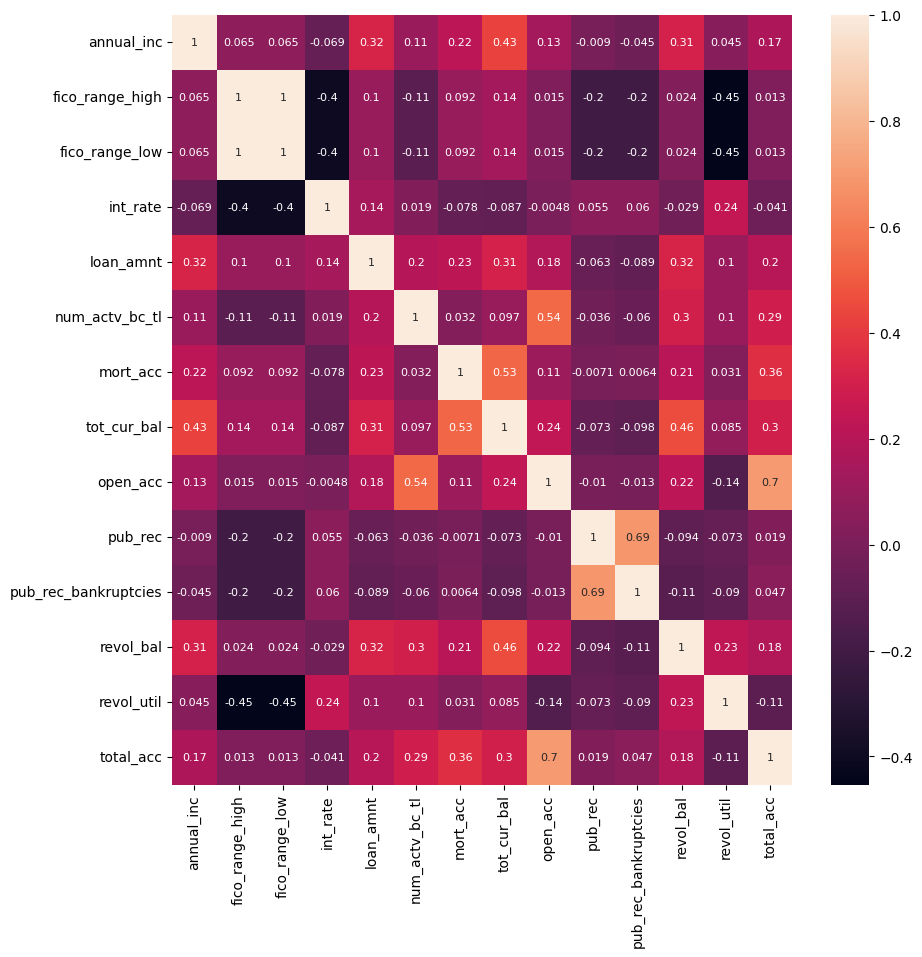

In [51]:
plt.figure(figsize = (10,10),)
sns.heatmap(train.corr(),annot = True, annot_kws = {'size':8})
plt.show()


In [52]:
cat_cols = data.select_dtypes(include=object).columns
num_cols = data.drop(columns='loan_status').select_dtypes(include=np.number).columns
print(cat_cols, num_cols)

Index(['addr_state', 'earliest_cr_line', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object') Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')


<Axes: ylabel='loan_status'>

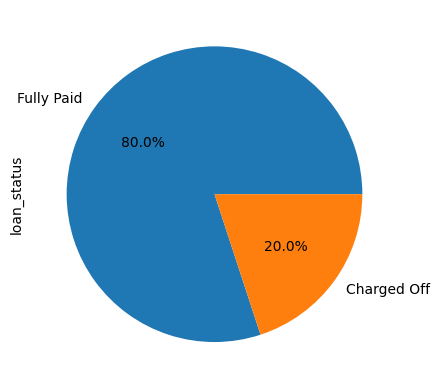

In [53]:
data['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')

In [58]:
# pipeline method
cat_encode = Pipeline(steps=[('in', OneHotEncoder(handle_unknown='ignore'))])
num_encode = Pipeline(steps=[('cep', StandardScaler())])
cat_encode, num_encode

(Pipeline(steps=[('in', OneHotEncoder(handle_unknown='ignore'))]),
 Pipeline(steps=[('cep', StandardScaler())]))

In [80]:
all_col_link = ColumnTransformer(transformers=[
    ('categorical',cat_encode,cat_cols),
    ('numerical',num_encode,num_cols),
])
all_col_link

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('in',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['addr_state', 'earliest_cr_line', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('cep', StandardScaler())]),
                                 Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object'))])

In [88]:
pipe = Pipeline(steps=[
    ('preprocessing',all_col_link)
])
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('in',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['addr_state', 'earliest_cr_line', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('cep',
                                                                   StandardScaler())]),
                                                  Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object'))]))])